In [ ]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pymongo import MongoClient

Connecting to MongoDB 

In [2]:
from pymongo import MongoClient
import os
import pandas as pd
import base64
import bson
from bson.binary import Binary
import matplotlib.pyplot as plt

client = MongoClient('mongodb://localhost:27017/')

storage_db = client['storage']

files_collection = storage_db['files']

In [3]:
def get_category(name):
    if(name == 'GOOG'or name == 'MSFT'or name == 'AAPL'):
        return 'IT';
    elif(name == 'NFLX' or name == 'DIS' or name == 'SPOT'):
        return 'ENTERTAINMENT';
    elif(name == 'BAC'or name == 'V'or name == 'MA'):
        return 'FINANCIAL';
    elif(name == 'VWAGY' or name == 'F' or name == 'TSLA'):
        return 'AUTOMOBILE';
    elif(name == 'WMT' or name == 'COST' or name == 'BBY'):
        return 'RETAIL';
    elif(name == 'FB' or name == 'SNAP' or name == 'TWTR'):
        return 'SOCIALMEDIA';

Storing the Data in the MongoDB

In [4]:
def insert_file():
    for file in os.listdir(r"C:/Users/saima/OneDrive/Documents/DATA 603/Updated"):
        filename = r"C:/Users/saima/OneDrive/Documents/DATA 603/Updated/"+file
        with open(filename, "rb") as f:
            encoded = Binary(f.read())
        name_split = filename.split('/')
        name = name_split[len(name_split)-1].split('.')[0]
        print(name)
        record = {"file": name, "content": encoded,"category":get_category(name)}
        files_collection.insert_one(record)

In [5]:
files_collection.remove()

C:\Users\saima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """Entry point for launching an IPython kernel.


{'n': 18, 'ok': 1.0}

In [6]:
insert_file()

AAPL
BAC
BBY
COST
DIS
F
FB
GOOG
MA
MSFT
NFLX
SNAP
SPOT
TSLA
TWTR
V
VWAGY
WMT


In [7]:
import io
    
for i in files_collection.find({"file":"MSFT"}):
    Microsoft=pd.read_csv(io.StringIO(i.get('content').decode("utf-8")))
    
for i in files_collection.find({"file":"AAPL"}):
    Apple=pd.read_csv(io.StringIO(i.get('content').decode("utf-8")))
    

Analyzing the High value of Stocks

In [8]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)


x_data = np.vstack((np.arange(2015, 2021),)*1)
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x= Microsoft['Date'].tolist(), y=Microsoft['High'].tolist(),
                    mode='lines',
                    name='Microsoft'))
fig.add_trace(go.Scatter(x= Apple['Date'].tolist(), y=Apple['High'].tolist(),
                    mode='lines',
                    name='Apple'))
fig.show()

In [9]:
def plot_highvalue(category):
    dfs = []
    category_name = ' '
    for i in category:
        category_name = i.get('category')
        data = i.get('content')
        df = pd.read_csv(io.StringIO(data.decode("utf-8")))
        col = i.get('file')
        df[col] = df['High']
        dfs.append(df[col])
    pd.concat(dfs, axis = 1).plot(figsize = (10,5), )
    plt.suptitle(i.get(category))
    plt.xlabel(category_name)
    plt.ylabel('Behavior of High Value')
    plt.show()

The behavior of high value of Stock in each Category chosen over the past 5 years

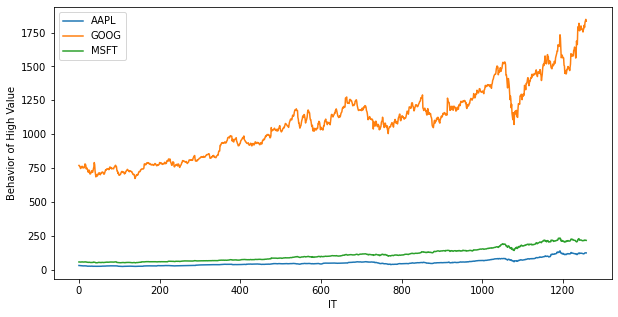

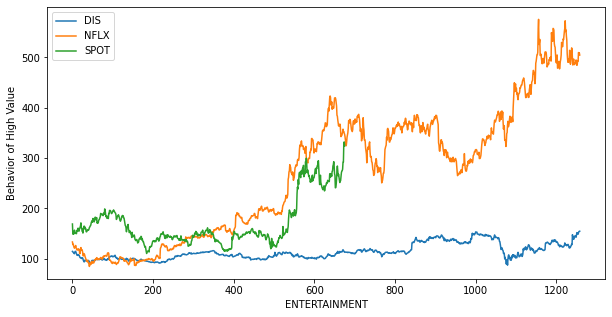

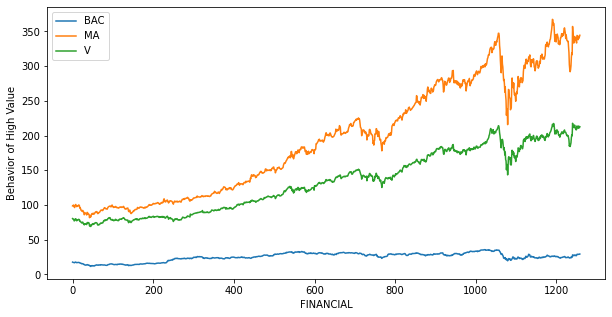

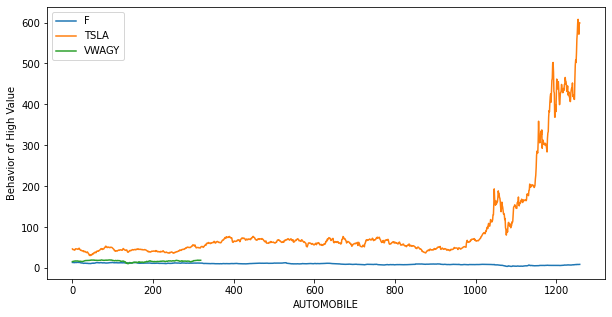

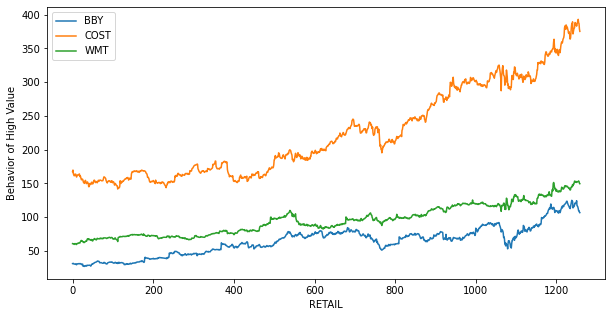

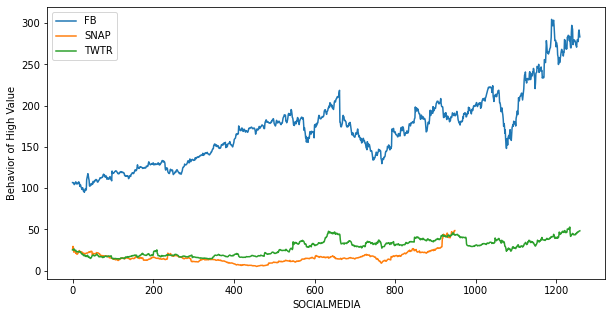

In [10]:
import io

it_category = files_collection.find({"category":"IT"})
entertainment_category = files_collection.find({"category":"ENTERTAINMENT"})
financial_category = files_collection.find({"category":"FINANCIAL"})
automobile_category = files_collection.find({"category":"AUTOMOBILE"})
retail_category = files_collection.find({"category":"RETAIL"})
sm_category = files_collection.find({"category":"SOCIALMEDIA"})
#print(it_category)

plot_highvalue(it_category)
plot_highvalue(entertainment_category)
plot_highvalue(financial_category)
plot_highvalue(automobile_category)
plot_highvalue(retail_category)
plot_highvalue(sm_category)


In [11]:
def plot_netvalue(category):
    dfs = []
    category_name = ' '
    for i in category:
        category_name = i.get('category')
        data = i.get('content')
        df = pd.read_csv(io.StringIO(data.decode("utf-8")))
        col = i.get('file')
        df[col] = df['Close'] - df['Open']
        dfs.append(df[col])
    pd.concat(dfs, axis = 1).plot(figsize = (10,5), )
    plt.suptitle(i.get(category))
    plt.xlabel(category_name)
    plt.ylabel('Behavior of Net Value')
    plt.show()

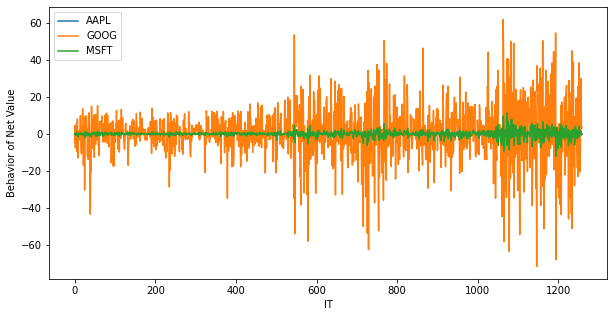

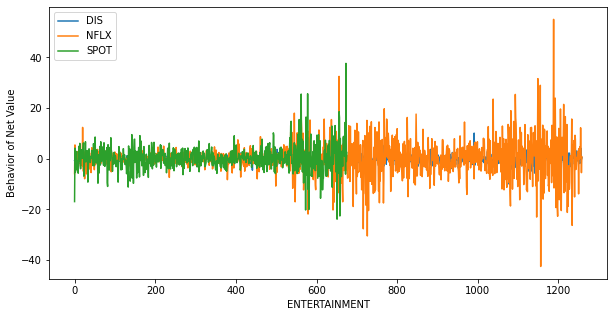

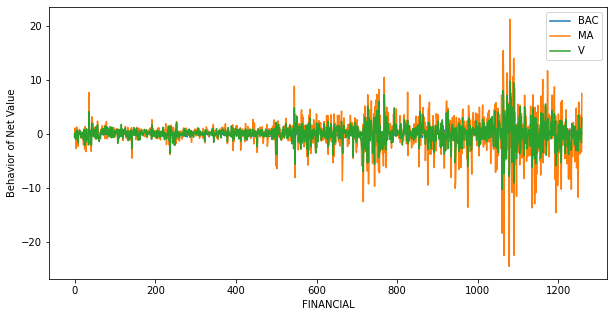

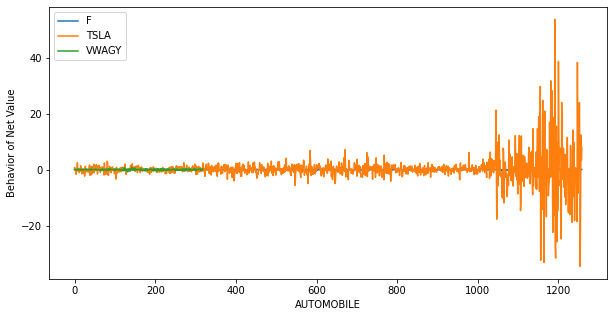

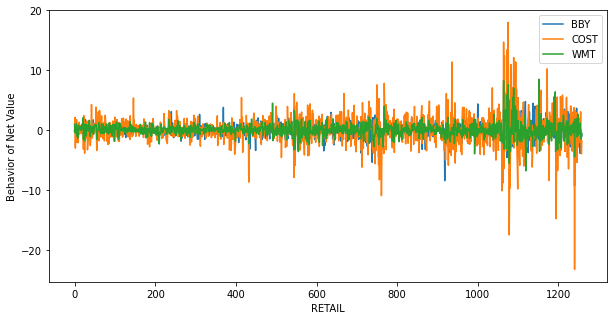

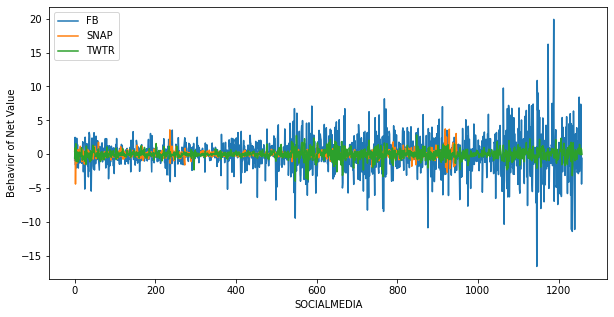

In [12]:
it_category = files_collection.find({"category":"IT"})
entertainment_category = files_collection.find({"category":"ENTERTAINMENT"})
financial_category = files_collection.find({"category":"FINANCIAL"})
automobile_category = files_collection.find({"category":"AUTOMOBILE"})
retail_category = files_collection.find({"category":"RETAIL"})
sm_category = files_collection.find({"category":"SOCIALMEDIA"})
#print(it_category)

plot_netvalue(it_category)
plot_netvalue(entertainment_category)
plot_netvalue(financial_category)
plot_netvalue(automobile_category)
plot_netvalue(retail_category)
plot_netvalue(sm_category)

In [1]:
pip install pyspark

     |████████████████████████████████| 204.2MB 75kB/s 
     |████████████████████████████████| 204kB 50.5MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=bc1ae6219c8ab43a9183ad58bbd14d2f89c70148864a258900b7579acea80462
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


Importing the required packages and libraries

In [39]:
import pyspark
from pyspark.sql.functions import pandas_udf, PandasUDFType
from pyspark.sql.types import StructType,StructField,StringType,LongType,DoubleType,FloatType

import statsmodels.tsa.api as sm
import numpy as np
import pandas as pd

In [40]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [41]:
from pyspark import SparkContext, SparkConf

In [43]:
sc.stop()
conf = SparkConf().setAppName("Spark")
sc = SparkContext(conf=conf)

In [44]:
spark = SparkSession.builder.appName("Project").config("spark.jars.packages", "io.delta:delta-core_2.12:0.7.0") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .getOrCreate()

We have decided to perform analysis on the Stocks in IT sector and predicted the trend of high value of the stock using fbprophet 

**Apple Stock value analysis**

In [45]:
from pyspark.sql.types import *

# structure of the training data set
train_schema = StructType([
  StructField('Date', DateType()),
  StructField('Open', FloatType()),
  StructField('Low', FloatType()),
  StructField('High', FloatType()),
  StructField('Close', FloatType())
  ])

# read the training file into a dataframe
import io
for i in files_collection.find({"file":"AAPL"}):
    Apple=pd.read_csv(io.StringIO(i.get('content').decode("utf-8")))

train = spark.createDataFrame(Apple)    
# train = spark.read.csv(
#   'AAPL.csv', 
#   header=True, 
#   schema=train_schema
#   )

# make the dataframe queriable as a temporary view
train.createOrReplaceTempView('train')

In [46]:
train.show()

+----------+------------------+------------------+------------------+------------------+------------------+---------+
|      Date|              Open|              High|               Low|             Close|         Adj Close|   Volume|
+----------+------------------+------------------+------------------+------------------+------------------+---------+
|2015-12-07|29.745001000000002|            29.965|         29.452499|             29.57|27.173284999999996|128336800|
|2015-12-08|29.379998999999998|             29.65|            29.215|29.557501000000002|         27.161795|137238000|
|2015-12-09|             29.41|         29.422501|             28.77|28.905001000000002|26.562178000000003|185445600|
|2015-12-10|             29.01|         29.235001|28.877501000000002|           29.0425|26.688534000000004|116850800|
|2015-12-11|         28.797501|           28.8475|           28.2125|            28.295|26.001623000000002|187544800|
|2015-12-14|            28.045|             28.17|      

In [47]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    High as y
  FROM train
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
history_pd = history_pd.dropna()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [48]:
history_pd.head()

ds          y
0  2015-12-07  29.965000
1  2015-12-08  29.650000
2  2015-12-09  29.422501
3  2015-12-10  29.235001
4  2015-12-11  28.847500

In [49]:
from fbprophet import Prophet

In [50]:
import logging

# disable informational messages from fbprophet
logging.getLogger('py4j').setLevel(logging.ERROR)

Apple Stock High Value Analysis and Trend Forecasting

In [51]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(history_pd)

In [52]:
future_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_pd = model.predict(future_pd)

forecast_pd.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-12-07  4.710851   24.215764   31.978790     4.710851     4.710851   
1 2015-12-08  4.697042   24.273695   32.076444     4.697042     4.697042   
2 2015-12-09  4.683233   24.496184   32.007744     4.683233     4.683233   
3 2015-12-10  4.669424   24.267151   32.056828     4.669424     4.669424   
4 2015-12-11  4.655615   24.194704   31.652026     4.655615     4.655615   

   multiplicative_terms  multiplicative_terms_lower  \
0              4.990691                    4.990691   
1              5.009494                    5.009494   
2              5.023868                    5.023868   
3              5.023823                    5.023823   
4              5.014983                    5.014983   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    4.990691  4.771329      4.771329      4.771329  0.219363   
1                    5.009494  4.785043      4.785043      4.785043  0.224451   
2                    5.023868  4.793300      4.793300      4.793300  0.230568   
3                    5.023823  4.786244      4.786244      4.786244  0.237579   
4                    5.014983  4.769657      4.769657      4.769657  0.245327   

   yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
0      0.219363      0.219363             0.0                   0.0   
1      0.224451      0.224451             0.0                   0.0   
2      0.230568      0.230568             0.0                   0.0   
3      0.237579      0.237579             0.0                   0.0   
4      0.245327      0.245327             0.0                   0.0   

   additive_terms_upper       yhat  
0                   0.0  28.221258  
1                   0.0  28.226845  
2                   0.0  28.211179  
3                   0.0  28.127782  
4                   0.0  28.003445

In [53]:
forecast_pd['new_ds'] = pd.to_datetime(forecast_pd['ds']).dt.date

Model performance in predicting the high value of Apple Stock

In [54]:
import plotly.graph_objects as go
from datetime import date
# Create random data with numpy
import numpy as np
np.random.seed(1)


x_data = np.vstack((np.arange(2015, 2021),)*1)
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x= history_pd['ds'].tolist(), y=history_pd['y'].tolist(),
                    mode='lines',
                    name='Actual'))
fig.add_trace(go.Scatter(x= forecast_pd['ds'].tolist(), y=forecast_pd[forecast_pd['new_ds']< date(2020, 12, 4)]['yhat'].tolist(),
                    mode='lines',
                    name='Predicted'))
fig.show()

Here we can see the general and seasonal trends in our model presented

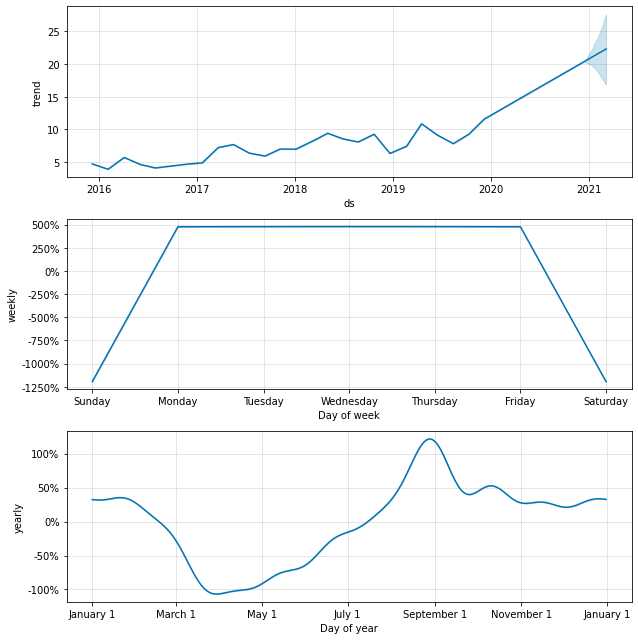

In [55]:
trends_fig = model.plot_components(forecast_pd)


In [56]:
forecast_pd['new_ds'] = pd.to_datetime(forecast_pd['ds']).dt.date

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# get historical actuals & predictions for comparison
actuals_pd = history_pd[ history_pd['ds'] < date(2020, 12, 4) ]['y']

predicted_pd = forecast_pd[ forecast_pd['new_ds'] < date(2020, 12, 4) ]['yhat']

# calculate evaluation metrics
mae = mean_absolute_error(actuals_pd, predicted_pd)
mse = mean_squared_error(actuals_pd, predicted_pd)
rmse = sqrt(mse)

In [58]:
mae

1.4068644430047843

In [59]:
mse

3.824155134834479

In [60]:
rmse

1.9555447156315497

Apple Stock Net Value Analysis and Trend Forecasting

In [61]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    Close,
    Open
  FROM train
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
net_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
net_pd = net_pd.dropna()

In [62]:
net_pd['y']=net_pd['Close'] - net_pd['Open']

In [63]:
net_pd.drop(["Close","Open"],axis=1,inplace=True)

In [64]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(net_pd)

In [65]:
future_net_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_net_pd = model.predict(future_net_pd)

forecast_net_pd.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-12-07 -0.003210   -1.895570    1.771908    -0.003210    -0.003210   
1 2015-12-08 -0.003162   -1.870727    1.815517    -0.003162    -0.003162   
2 2015-12-09 -0.003114   -1.758185    1.790493    -0.003114    -0.003114   
3 2015-12-10 -0.003066   -1.826925    1.853144    -0.003066    -0.003066   
4 2015-12-11 -0.003018   -1.802368    1.720687    -0.003018    -0.003018   

   multiplicative_terms  multiplicative_terms_lower  \
0              0.015299                    0.015299   
1             -0.005587                   -0.005587   
2             -0.000120                   -0.000120   
3             -0.004964                   -0.004964   
4             -0.003338                   -0.003338   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    0.015299  0.014456      0.014456      0.014456  0.000843   
1                   -0.005587 -0.006853     -0.006853     -0.006853  0.001266   
2                   -0.000120 -0.001769     -0.001769     -0.001769  0.001649   
3                   -0.004964 -0.006949     -0.006949     -0.006949  0.001985   
4                   -0.003338 -0.005611     -0.005611     -0.005611  0.002273   

   yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
0      0.000843      0.000843             0.0                   0.0   
1      0.001266      0.001266             0.0                   0.0   
2      0.001649      0.001649             0.0                   0.0   
3      0.001985      0.001985             0.0                   0.0   
4      0.002273      0.002273             0.0                   0.0   

   additive_terms_upper      yhat  
0                   0.0 -0.003259  
1                   0.0 -0.003144  
2                   0.0 -0.003114  
3                   0.0 -0.003051  
4                   0.0 -0.003008

In [66]:
forecast_net_pd['new_ds'] = pd.to_datetime(forecast_net_pd['ds']).dt.date

Here we can see the general and seasonal trends in our model presented for net value 

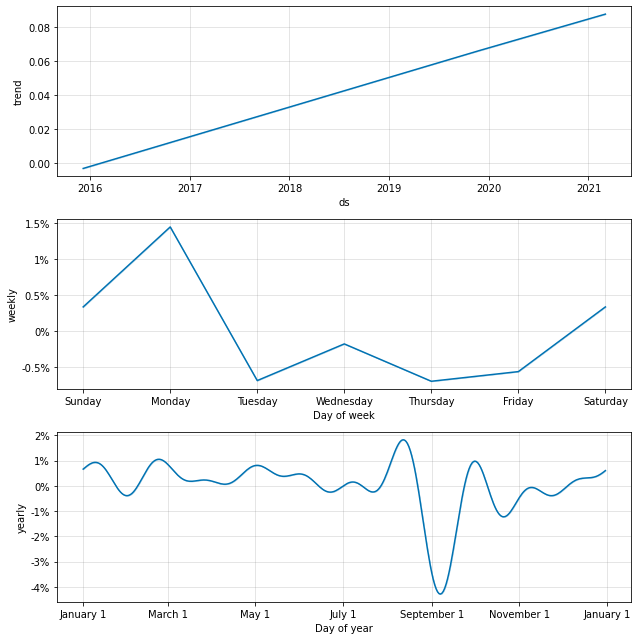

In [67]:
trends_fig = model.plot_components(forecast_net_pd)

**Microsoft Stock value analysis**

In [68]:
import io
for i in files_collection.find({"file":"MSFT"}):
    Microsoft=pd.read_csv(io.StringIO(i.get('content').decode("utf-8")))

train_microsoft = spark.createDataFrame(Microsoft)   

# make the dataframe queriable as a temporary view
train_microsoft.createOrReplaceTempView('train_microsoft')

Microsoft Stock High Value Analysis and Trend Forecasting

In [69]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    High as y
  FROM train_microsoft
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
history_pd = history_pd.dropna()

In [70]:
history_pd.head()

ds          y
0  2015-12-07  55.970001
1  2015-12-08  56.099998
2  2015-12-09  55.869999
3  2015-12-10  55.660000
4  2015-12-11  55.099998

In [71]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(history_pd)


In [72]:
future_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_pd = model.predict(future_pd)

display(forecast_pd)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2015-12-07  11.862330   50.255806   62.734243    11.862330    11.862330   
1    2015-12-08  11.837656   50.075829   62.744017    11.837656    11.837656   
2    2015-12-09  11.812982   50.483766   62.931425    11.812982    11.812982   
3    2015-12-10  11.788308   49.988451   62.648842    11.788308    11.788308   
4    2015-12-11  11.763634   49.816974   62.437772    11.763634    11.763634   
...         ...        ...         ...         ...          ...          ...   
1344 2021-02-28  48.754320 -465.241571 -384.984546    44.123874    53.237759   
1345 2021-03-01  48.791107  212.764391  258.629066    44.086827    53.356884   
1346 2021-03-02  48.827894  212.191701  257.699442    44.049779    53.500352   
1347 2021-03-03  48.864681  210.437657  257.449867    44.012731    53.619430   
1348 2021-03-04  48.901467  210.277005  256.776529    43.975684    53.737029   

      multiplicative_terms  multiplicative_terms_lower  \
0                 3.762990                    3.762990   
1                 3.774373                    3.774373   
2                 3.778058                    3.778058   
3                 3.784195                    3.784195   
4                 3.782466                    3.782466   
...                    ...                         ...   
1344             -9.744352                   -9.744352   
1345              3.852953                    3.852953   
1346              3.834819                    3.834819   
1347              3.807640                    3.807640   
1348              3.781881                    3.781881   

      multiplicative_terms_upper    weekly  weekly_lower  weekly_upper  \
0                       3.762990  3.887142      3.887142      3.887142   
1                       3.774373  3.896007      3.896007      3.896007   
2                       3.778058  3.896595      3.896595      3.896595   
3                       3.784195  3.899157      3.899157      3.899157   
4                       3.782466  3.893484      3.893484      3.893484   
...                          ...       ...           ...           ...   
1344                   -9.744352 -9.736193     -9.736193     -9.736193   
1345                    3.852953  3.887142      3.887142      3.887142   
1346                    3.834819  3.896007      3.896007      3.896007   
1347                    3.807640  3.896595      3.896595      3.896595   
1348                    3.781881  3.899157      3.899157      3.899157   

        yearly  yearly_lower  yearly_upper  additive_terms  \
0    -0.124152     -0.124152     -0.124152             0.0   
1    -0.121634     -0.121634     -0.121634             0.0   
2    -0.118537     -0.118537     -0.118537             0.0   
3    -0.114962     -0.114962     -0.114962             0.0   
4    -0.111018     -0.111018     -0.111018             0.0   
...        ...           ...           ...             ...   
1344 -0.008159     -0.008159     -0.008159             0.0   
1345 -0.034190     -0.034190     -0.034190             0.0   
1346 -0.061188     -0.061188     -0.061188             0.0   
1347 -0.088955     -0.088955     -0.088955             0.0   
1348 -0.117276     -0.117276     -0.117276             0.0   

      additive_terms_lower  additive_terms_upper        yhat  
0                      0.0                   0.0   56.500154  
1                      0.0                   0.0   56.517387  
2                      0.0                   0.0   56.443118  
3                      0.0                   0.0   56.397571  
4                      0.0                   0.0   56.259180  
...                    ...                   ...         ...  
1344                   0.0                   0.0 -426.324920  
1345                   0.0                   0.0  236.780925  
1346                   0.0                   0.0  236.074022  
1347                   0.0                   0.0  234.923805  
1348                   0.0  

Here we can see the general and seasonal trends in our model presented 

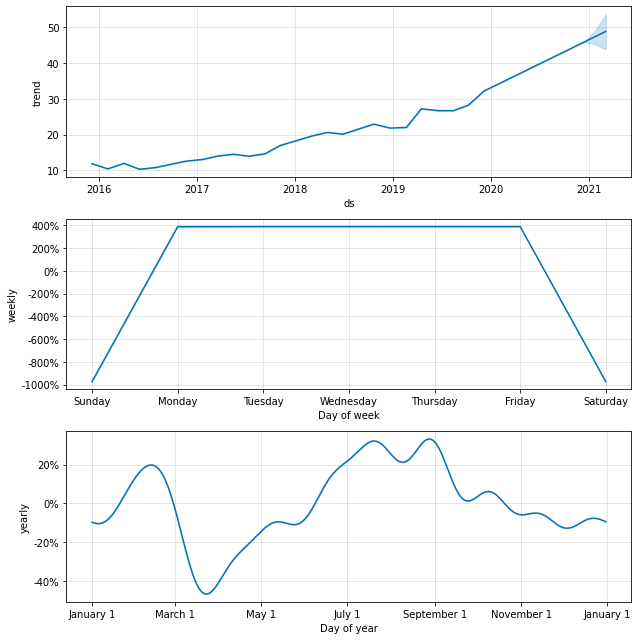

In [73]:
trends_fig = model.plot_components(forecast_pd)

Microsoft Net Value Analysis and Trend Forecasting

In [74]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    Close,
    Open
  FROM train_microsoft
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
net_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
net_pd = net_pd.dropna()

In [75]:
net_pd['y']=net_pd['Close'] - net_pd['Open']

In [76]:
net_pd.drop(["Close","Open"],axis=1,inplace=True)

In [77]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(net_pd)

In [78]:
future_net_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_net_pd = model.predict(future_net_pd)

forecast_net_pd.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-12-07 -0.018301   -3.333836    3.310777    -0.018301    -0.018301   
1 2015-12-08 -0.018260   -3.541379    3.341110    -0.018260    -0.018260   
2 2015-12-09 -0.018220   -3.528617    3.344916    -0.018220    -0.018220   
3 2015-12-10 -0.018180   -3.610392    3.495055    -0.018180    -0.018180   
4 2015-12-11 -0.018139   -3.439609    3.429268    -0.018139    -0.018139   

   multiplicative_terms  multiplicative_terms_lower  \
0              0.000169                    0.000169   
1             -0.000717                   -0.000717   
2             -0.000151                   -0.000151   
3             -0.000123                   -0.000123   
4             -0.000319                   -0.000319   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    0.000169  0.000176      0.000176      0.000176 -0.000006   
1                   -0.000717 -0.000725     -0.000725     -0.000725  0.000008   
2                   -0.000151 -0.000175     -0.000175     -0.000175  0.000024   
3                   -0.000123 -0.000163     -0.000163     -0.000163  0.000041   
4                   -0.000319 -0.000378     -0.000378     -0.000378  0.000059   

   yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
0     -0.000006     -0.000006             0.0                   0.0   
1      0.000008      0.000008             0.0                   0.0   
2      0.000024      0.000024             0.0                   0.0   
3      0.000041      0.000041             0.0                   0.0   
4      0.000059      0.000059             0.0                   0.0   

   additive_terms_upper      yhat  
0                   0.0 -0.018304  
1                   0.0 -0.018247  
2                   0.0 -0.018217  
3                   0.0 -0.018177  
4                   0.0 -0.018133

In [79]:
forecast_net_pd['new_ds'] = pd.to_datetime(forecast_net_pd['ds']).dt.date

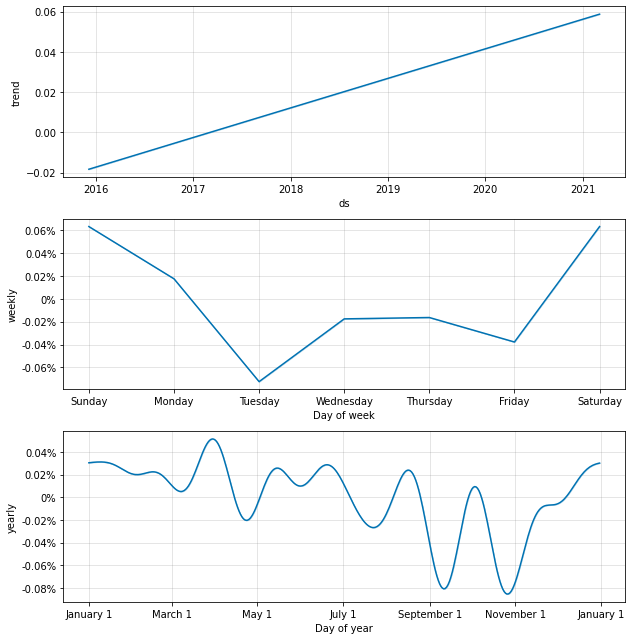

In [80]:
trends_fig = model.plot_components(forecast_net_pd)

Google Stock value analysis

In [84]:
import io
for i in files_collection.find({"file":"GOOG"}):
    Google=pd.read_csv(io.StringIO(i.get('content').decode("utf-8")))

train_google = spark.createDataFrame(Google)  

# make the dataframe queriable as a temporary view
train_google.createOrReplaceTempView('train_google')

Google High Value Stock Analysis and Trend Forecasting

In [85]:
train_google.show()

+----------+-----------------+-----------------+-----------------+-----------------+-----------------+-------+
|      Date|             Open|             High|              Low|            Close|        Adj Close| Volume|
+----------+-----------------+-----------------+-----------------+-----------------+-----------------+-------+
|2015-12-07|        767.77002|        768.72998|       755.090027|           763.25|           763.25|1812300|
|2015-12-08|757.8900150000001|       764.799988|       754.200012|       762.369995|       762.369995|1829500|
|2015-12-09|       759.169983|        764.22998|737.0009769999999|751.6099849999999|751.6099849999999|2700000|
|2015-12-10|       752.849976|       755.849976|       743.830017|       749.460022|       749.460022|1988400|
|2015-12-11|       741.159973|       745.710022|           736.75|       738.869995|       738.869995|2224400|
|2015-12-14|       741.789978|        748.72998|       724.169983|        747.77002|        747.77002|2412500|
|

In [86]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    High as y
  FROM train_google
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
history_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
history_pd = history_pd.dropna()

In [87]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(history_pd)

In [88]:
future_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_pd = model.predict(future_pd)

display(forecast_pd)

ds       trend   yhat_lower   yhat_upper  trend_lower  \
0    2015-12-07  111.611479   696.685928   825.866953   111.611479   
1    2015-12-08  111.454928   698.381085   820.260144   111.454928   
2    2015-12-09  111.298377   697.978015   825.261827   111.298377   
3    2015-12-10  111.141826   699.420116   831.271160   111.141826   
4    2015-12-11  110.985275   698.193165   823.143450   110.985275   
...         ...         ...          ...          ...          ...   
1344 2021-02-28  281.269494 -4241.838336 -2629.021931   214.490869   
1345 2021-03-01  281.455819  1364.047508  2227.382686   213.668138   
1346 2021-03-02  281.642145  1349.495406  2218.396830   212.976543   
1347 2021-03-03  281.828470  1358.284194  2215.309909   211.987425   
1348 2021-03-04  282.014795  1323.834576  2222.312839   211.126754   

      trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0      111.611479              5.790315                    5.790315   
1      111.454928              5.808264                    5.808264   
2      111.298377              5.823404                    5.823404   
3      111.141826              5.833556                    5.833556   
4      110.985275              5.837923                    5.837923   
...           ...                   ...                         ...   
1344   344.562330            -13.280399                  -13.280399   
1345   345.563309              5.435730                    5.435730   
1346   347.043510              5.418017                    5.418017   
1347   348.488008              5.396207                    5.396207   
1348   349.517215              5.368298                    5.368298   

      multiplicative_terms_upper     weekly  weekly_lower  weekly_upper  \
0                       5.790315   5.346998      5.346998      5.346998   
1                       5.808264   5.355755      5.355755      5.355755   
2                       5.823404   5.361952      5.361952      5.361952   
3                       5.833556   5.363544      5.363544      5.363544   
4                       5.837923   5.359864      5.359864      5.359864   
...                          ...        ...           ...           ...   
1344                  -13.280399 -13.394056    -13.394056    -13.394056   
1345                    5.435730   5.346998      5.346998      5.346998   
1346                    5.418017   5.355755      5.355755      5.355755   
1347                    5.396207   5.361952      5.361952      5.361952   
1348                    5.368298   5.363544      5.363544      5.363544   

        yearly  yearly_lower  yearly_upper  additive_terms  \
0     0.443317      0.443317      0.443317             0.0   
1     0.452508      0.452508      0.452508             0.0   
2     0.461452      0.461452      0.461452             0.0   
3     0.470012      0.470012      0.470012             0.0   
4     0.478060      0.478060      0.478060             0.0   
...        ...           ...           ...             ...   
1344  0.113657      0.113657      0.113657             0.0   
1345  0.088733      0.088733      0.088733             0.0   
1346  0.062262      0.062262      0.062262             0.0   
1347  0.034254      0.034254      0.034254             0.0   
1348  0.004754      0.004754      0.004754             0.0   

      additive_terms_lower  additive_terms_upper         yhat  
0                      0.0                   0.0   757.877064  
1                      0.0                   0.0   758.814532  
2                      0.0                   0.0   759.433830  
3                      0.0                   0.0   759.493867  
4                      0.0                   0.0   758.908799  
...                    ...                   ...          ...  
1344                   0.0                   0.0 -3454.101562  
1345                   0.0                   0.0  1811.373708  
1346                   0.0                   0.0  1807.584134  
1347                   0.0       

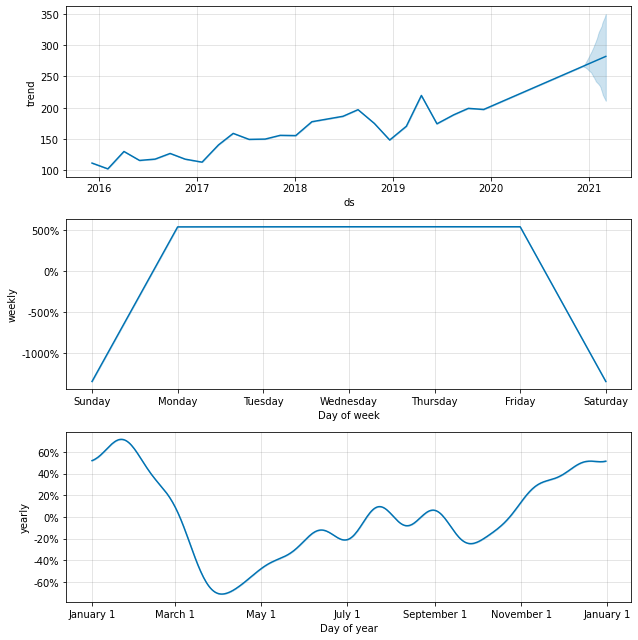

In [89]:
trends_fig = model.plot_components(forecast_pd)

Google Net Value Stock Analysis and Trend Forecasting

In [90]:
sql_statement = '''
  SELECT
    CAST(Date as date) as ds,
    Close,
    Open
  FROM train_google
  ORDER BY ds
  '''

# assemble dataset in Pandas dataframe
net_pd = spark.sql(sql_statement).toPandas()

# drop any missing records
net_pd = net_pd.dropna()

In [91]:
net_pd['y']=net_pd['Close'] - net_pd['Open']

In [92]:
net_pd.drop(["Close","Open"],axis=1,inplace=True)

In [93]:
model = Prophet(
  interval_width=0.95,
  growth='linear',
  daily_seasonality=False,
  weekly_seasonality=True,
  yearly_seasonality=True,
  seasonality_mode='multiplicative'
  )

# fit the model to historical data
model.fit(net_pd)

In [94]:
future_net_pd = model.make_future_dataframe(
  periods=90, 
  freq='d', 
  include_history=True
  )

# predict over the dataset
forecast_net_pd = model.predict(future_net_pd)

forecast_net_pd.head()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2015-12-07 -0.550634  -27.951799   27.775701    -0.550634    -0.550634   
1 2015-12-08 -0.549252  -27.881286   28.961351    -0.549252    -0.549252   
2 2015-12-09 -0.547869  -30.229548   30.405150    -0.547869    -0.547869   
3 2015-12-10 -0.546487  -31.429077   27.939361    -0.546487    -0.546487   
4 2015-12-11 -0.545105  -28.480988   28.885323    -0.545105    -0.545105   

   multiplicative_terms  multiplicative_terms_lower  \
0              0.004519                    0.004519   
1             -0.015487                   -0.015487   
2             -0.000335                   -0.000335   
3              0.016415                    0.016415   
4             -0.043524                   -0.043524   

   multiplicative_terms_upper    weekly  weekly_lower  weekly_upper    yearly  \
0                    0.004519  0.005017      0.005017      0.005017 -0.000498   
1                   -0.015487 -0.011683     -0.011683     -0.011683 -0.003804   
2                   -0.000335  0.006629      0.006629      0.006629 -0.006964   
3                    0.016415  0.026316      0.026316      0.026316 -0.009901   
4                   -0.043524 -0.030981     -0.030981     -0.030981 -0.012543   

   yearly_lower  yearly_upper  additive_terms  additive_terms_lower  \
0     -0.000498     -0.000498             0.0                   0.0   
1     -0.003804     -0.003804             0.0                   0.0   
2     -0.006964     -0.006964             0.0                   0.0   
3     -0.009901     -0.009901             0.0                   0.0   
4     -0.012543     -0.012543             0.0                   0.0   

   additive_terms_upper      yhat  
0                   0.0 -0.553122  
1                   0.0 -0.540746  
2                   0.0 -0.547686  
3                   0.0 -0.555458  
4                   0.0 -0.521380

Here we can see the general and seasonal trends in our model presented on Net Value

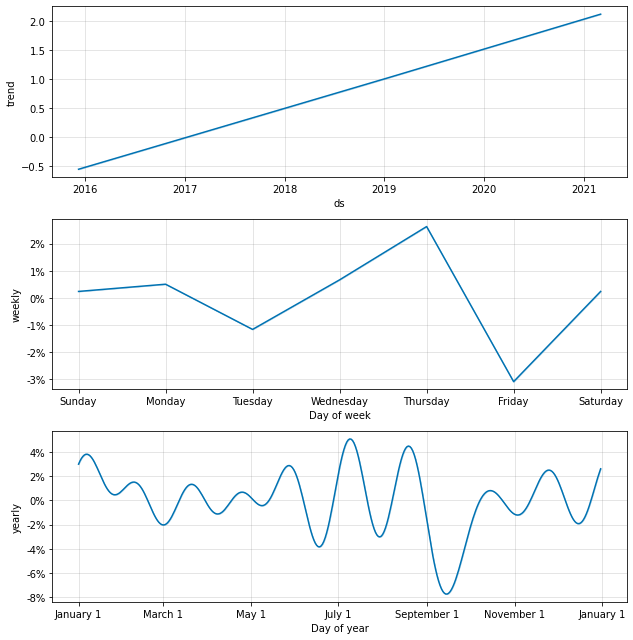

In [95]:
trends_fig = model.plot_components(forecast_net_pd)